In [17]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn')

In [18]:
# Data Processing
dfxtest = pd.read_csv(r'F:\PRATIK\ml\Logistic_X_Test.csv')
dfxtrain = pd.read_csv(r'F:\PRATIK\ml\Logistic_X_Train.csv')
dfytrain = pd.read_csv(r'F:\PRATIK\ml\Logistic_Y_Train.csv')


class_0 = dfxtrain.loc[(dfytrain['label']==0)]
class_1 = dfxtrain.loc[(dfytrain['label']==1)]

print(class_0)
print(class_1)

            f1        f2        f3
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
5     0.656532  0.991440  0.870280
6     1.453978  0.583741  1.277378
7     1.124756  1.116124  1.442579
...        ...       ...       ...
2989  0.699160  0.694300  1.009333
2991  1.037060  0.399231  1.602371
2992  1.019020  1.297817  1.016635
2993  0.235431  0.125862  0.597009
2998  1.525155  0.859234  1.505308

[1509 rows x 3 columns]
            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
8    -1.723841 -0.175289 -0.588835
9    -0.794138  1.958963 -0.270497
...        ...       ...       ...
2994 -2.509041 -0.625524 -0.632085
2995 -0.455628  1.302303 -1.338027
2996 -0.434551  1.597813 -1.748643
2997  0.088277  1.638789 -2.193641
2999 -0.979817  0.563954 -1.539394

[1491 rows x 3 columns]


In [19]:
# Model Training
from sklearn.linear_model import LogisticRegression

chemical_model = LogisticRegression()
chemical_model.fit(dfxtrain, dfytrain)

bias = chemical_model.intercept_
coef = chemical_model.coef_

print(bias, coef, sep='\n\n')

[-4.27017148]

[[-3.92798396  3.10147056 -2.28040541]]


C:\Users\OM SAI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Testing the model
Train_output = chemical_model.predict(dfxtest)
class0_pred = dfxtest.loc[(Train_output == 0)]
class1_pred = dfxtest.loc[(Train_output == 1)]
df = pd.DataFrame(Train_output)
print(df)

     0
0    1
1    1
2    0
3    1
4    1
..  ..
995  0
996  0
997  1
998  1
999  0

[1000 rows x 1 columns]


In [21]:
#Accuracy of Model
print('The Accuracy of model is' , chemical_model.score(dfxtrain, dfytrain))

The Accuracy of model is 0.9953333333333333


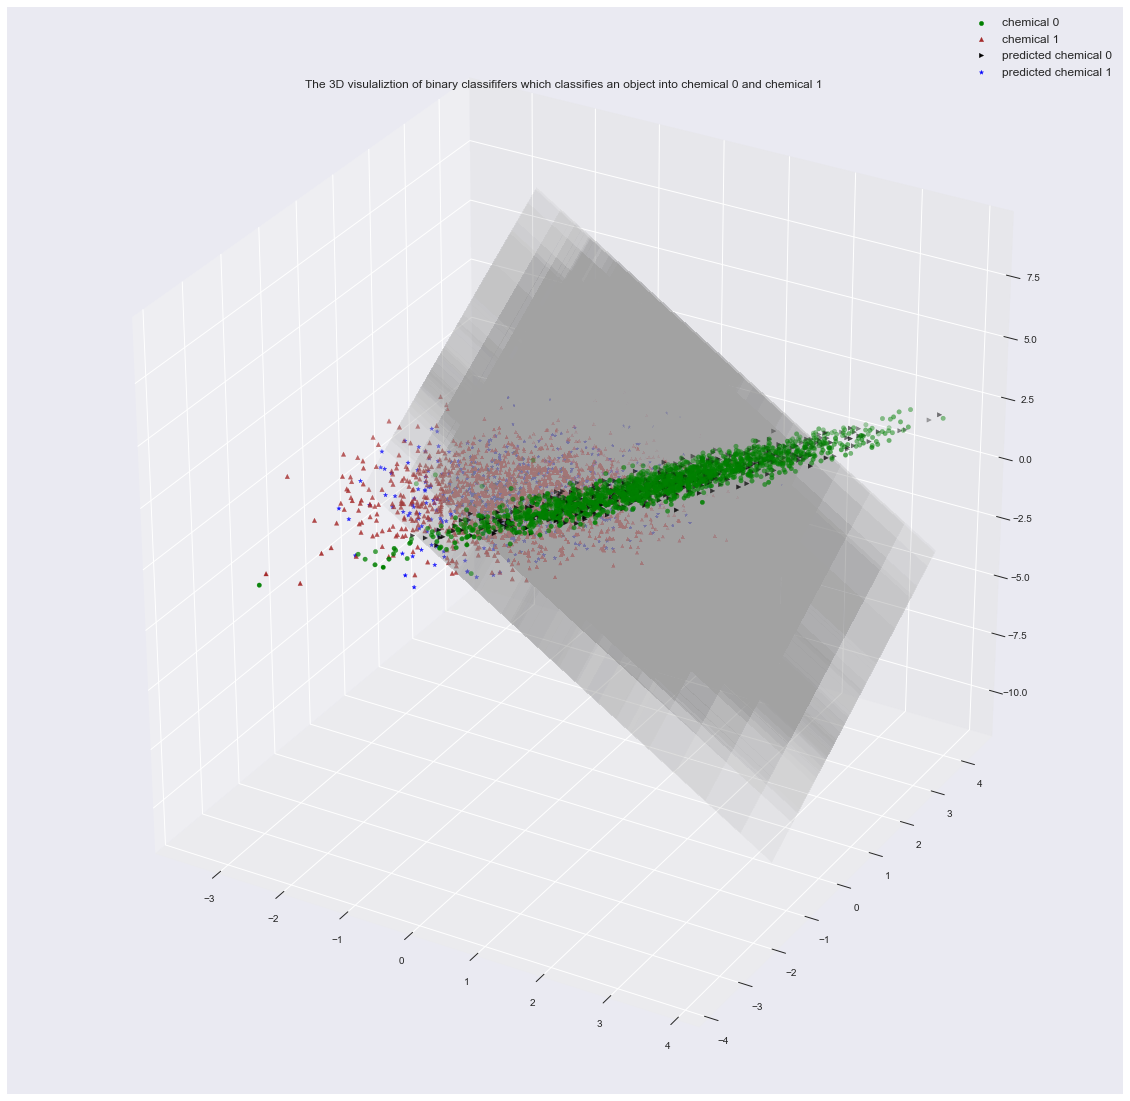

In [22]:
#Visualizing the model in 3D form
fig = plt.figure(figsize=(20,20))

ax = plt.axes(projection='3d')

ax.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='chemical 0', color='Green')
ax.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='chemical 1', color='Brown', marker='^')

x = dfxtest['f1']
y = dfxtest['f2']

xx, yy = np.meshgrid(x, y)

z = -((coef[0][1]*yy + coef[0][0]*xx + bias )/coef[0][2]) 

ax.plot_surface(xx,yy,z, alpha=0.02, color='w')
ax.scatter3D(class0_pred['f1'],class0_pred['f2'],class0_pred['f3'], label='predicted chemical 0', marker='>', color='black')
ax.scatter3D(class1_pred['f1'],class1_pred['f2'],class1_pred['f3'], label='predicted chemical 1', marker='*', color='blue')
ax.legend(fontsize=12)
plt.title('The 3D visulaliztion of binary classififers which classifies an object into chemical 0 and chemical 1 ')
plt.show()